#  1. Preparation

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

In [2]:
# Load sound files
filename = './data/0620-blues.00001.wav'

# Get 'y' and 'sr'
y, sr = librosa.load(filename)   # 'sr': Sampling Rate(Integer of Sampling speed)
print('SR Rate: ', sr)  

SR Rate:  22050


# 2.  Calculate Short-Time Fourier Transform(STFT) from Sound Files

In [3]:
# Window size: Devided size when a spectrogram is generated
hop_length = 512

# Set FFT - FFT: Extract frequency information from a given time band
n_fft = 2048

# Get spectrogram values(Time-Frequency domain)
stft = librosa.stft(y,  # Timeseries data
                    n_fft = n_fft,  # Frequency
                    hop_length = hop_length)  # Windowsize

print(stft)

[[ 5.3796820e-02+0.0000000e+00j  2.8211858e+00+0.0000000e+00j
   7.7053776e+00+0.0000000e+00j ... -1.4414183e+00+0.0000000e+00j
  -1.3481982e+00+0.0000000e+00j -4.1797791e+00+0.0000000e+00j]
 [ 5.0167871e-01+8.3506501e-01j -4.0155300e-01+1.2011561e+00j
  -3.8527081e+00+3.6937428e+00j ... -3.1102002e-01+1.2594367e+00j
   1.1273700e+00-1.0498327e+00j  2.2146888e+00-2.0105529e+00j]
 [-1.9553659e+00-6.6863143e-01j  1.9860005e+00+1.8980149e+00j
   1.9972939e+00-3.7817092e+00j ...  1.7908789e+00-1.4895716e+00j
  -1.7049931e+00+1.4737532e+00j  4.2140970e+00+2.6621089e+00j]
 ...
 [ 5.3247431e-04+2.3299521e-05j -3.7518758e-04-1.0608655e-04j
  -4.7851045e-05+1.9487874e-04j ...  7.8283356e-06+5.9137466e-05j
   1.2221524e-03-5.0121918e-03j -7.8109335e-03+3.6176901e-02j]
 [-4.1708208e-04+1.3295542e-04j  3.2084421e-04+3.4094224e-04j
   1.5252092e-04-2.3216791e-04j ... -7.8446043e-05-1.1500816e-04j
   3.7801645e-03-3.0535129e-03j -2.3120986e-02-2.8629614e-02j]
 [ 2.6630767e-04+0.0000000e+00j -2.04545

# 3. Calculate Mel Spectrogram 

In [5]:
# Number of Mel filters
n_mels = 40  # Normal values are between 20 and 40

# Get mel_spec: Get power spectrogram to decibel values
mel_spec = librosa.feature.melspectrogram(S = librosa.power_to_db(np.abs(stft) ** 2),   # librosa.power_to_db(): Convert amplitude to decibel form
                                                                                        # np.abs() ** 2: Squared value of an absolute value
                                                                                        # stft: Power spectrogram indicating amplitude
                                          sr = sr, 
                                          n_mels = n_mels)
print(mel_spec)

[[ 0.04016396  1.8871574   2.7044704  ...  1.5847964   1.5435765
   1.8997383 ]
 [ 0.3447038   1.8233913   2.2484555  ...  1.8193796   1.4597857
   1.5174086 ]
 [ 0.6592664   1.5573025   1.7091428  ...  1.7699649   1.6102383
   1.7226015 ]
 ...
 [-3.3274503  -2.7481508  -2.0501018  ... -1.5864515  -1.6176103
  -1.517935  ]
 [-3.3275244  -3.264066   -2.955185   ... -2.3985326  -2.3265347
  -2.0758762 ]
 [-3.327437   -3.327437   -3.3154142  ... -3.3145826  -3.3130703
  -2.6448479 ]]


# 4. Calculate Mel-Frequency Cepstral Coefficient

In [6]:
# Get parameter values that extract the desired number of feature vectors
n_mfcc = 13   # Default value is between 12 and 13

# Calculate MFCC: 
mfccs = librosa.feature.mfcc(S = librosa.power_to_db(mel_spec),
                             n_mfcc = n_mfcc)  # Number of MFCC
print(mfccs)

[[-423.04688   -405.76004   -319.62463   ... -314.74927   -339.26782
  -325.84183  ]
 [  74.737076    97.57477    183.01984   ...  171.12823    159.65662
   177.53833  ]
 [  69.05983     87.35002     89.49732   ...   67.10045     78.234024
    91.55201  ]
 ...
 [ -15.8296585  -20.409237   -17.092026  ...  -31.796183   -46.68096
    -7.1080694]
 [ -18.901978   -16.981878    -6.070834  ...  -11.331359   -28.349771
     6.483469 ]
 [ -19.175297   -10.651993     9.756364  ...   -9.648254     3.243166
    15.470432 ]]


# 5. Visualization

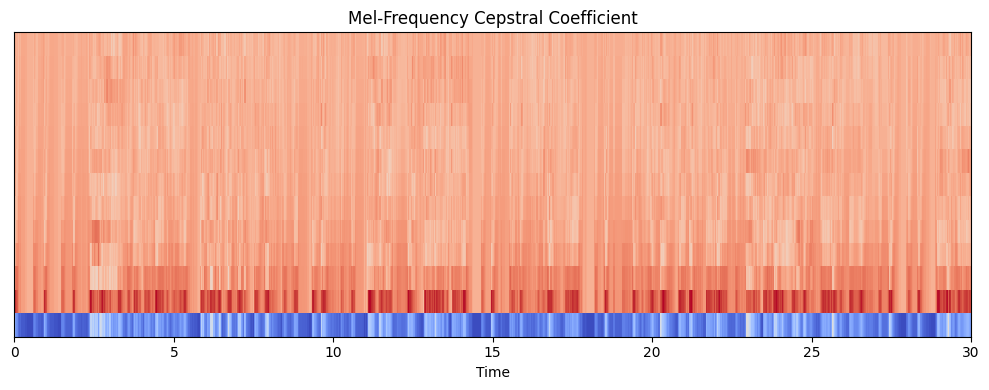

In [8]:
# Visualization
plt.figure(figsize = (10, 4))
librosa.display.specshow(mfccs, x_axis = 'time')
plt.title('Mel-Frequency Cepstral Coefficient')
plt.tight_layout()


In [10]:
# Save as a png file
plt.savefig('./data/MFCC.png',
            dpi = 300,    # 'dpi': Dots per Inch
            bbox_inches = 'tight')  # Cut out empty areas
plt.close()